# Portfolio Optimization using Deep Reinforcement Learning
----

## 2.0 Download the Data for the Analysis
---
* Data is Downloaded from Yahoo Finance using an API in the FinRL Library
* The 30 Dow Jones Industrial Average tickers for the period from 2009 to 2024 are used
* The data is downloaded and the cleaned data are saved in csv files for use

---


### 2.1 Import Relevant Packages

In [151]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-req-build-wfqa0gzt
  Running command git clone --quiet https://github.com/AI4Finance-Foundation/FinRL.git /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-req-build-wfqa0gzt
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 5b7ac9c2cf149d134b440d40f48a0040f3423b5e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-7qjmf6ce/elegantrl_79eb81ec2598481a85770323f0bb49cb
  Running command git clone --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-7qjmf6ce/elegantrl_79eb81ec2598481a85770323f0bb49cb
  Resolved https://github.com/AI4Finance

In [152]:
import pandas as pd
import numpy as np
from config import config
import matplotlib.pylab as plt

import yfinance as yf
from pandas_datareader import data as pdr

%matplotlib inline

### 2.2 Create Folders

In [153]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

### 2.3 Download the Dow Jines Industrial Average 30 Stocks

In [154]:
pip install niftystocks

Note: you may need to restart the kernel to use updated packages.


In [155]:
from niftystocks import ns

In [156]:
from niftystocks import ns

# Get the list of Nifty 50 tickers (including ".NS" suffix)
ticker_list = ns.get_nifty50_with_ns()

# Remove unwanted tickers (preserving case-sensitivity)
exclude_list = ["HDFC.NS", "HDFCLIFE.NS", "COALINDIA.NS", "SBILIFE.NS"]
ticker_list = [ticker for ticker in ticker_list if ticker not in exclude_list]

# Print the filtered list
print(ticker_list)
print(len(ticker_list))

['HDFCBANK.NS', 'IOC.NS', 'SHREECEM.NS', 'TATAMOTORS.NS', 'ADANIPORTS.NS', 'ULTRACEMCO.NS', 'BHARTIARTL.NS', 'HEROMOTOCO.NS', 'HINDUNILVR.NS', 'GRASIM.NS', 'TATASTEEL.NS', 'UPL.NS', 'AXISBANK.NS', 'LT.NS', 'POWERGRID.NS', 'SBIN.NS', 'WIPRO.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ONGC.NS', 'BAJAJFINSV.NS', 'CIPLA.NS', 'KOTAKBANK.NS', 'MARUTI.NS', 'TCS.NS', 'TITAN.NS', 'BPCL.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'NESTLEIND.NS', 'BAJFINANCE.NS', 'HCLTECH.NS', 'HINDALCO.NS', 'DRREDDY.NS', 'GAIL.NS', 'DIVISLAB.NS', 'NTPC.NS', 'TECHM.NS', 'ITC.NS', 'JSWSTEEL.NS', 'M&M.NS', 'SUNPHARMA.NS']
46


In [157]:
print(ticker_list)

['HDFCBANK.NS', 'IOC.NS', 'SHREECEM.NS', 'TATAMOTORS.NS', 'ADANIPORTS.NS', 'ULTRACEMCO.NS', 'BHARTIARTL.NS', 'HEROMOTOCO.NS', 'HINDUNILVR.NS', 'GRASIM.NS', 'TATASTEEL.NS', 'UPL.NS', 'AXISBANK.NS', 'LT.NS', 'POWERGRID.NS', 'SBIN.NS', 'WIPRO.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ONGC.NS', 'BAJAJFINSV.NS', 'CIPLA.NS', 'KOTAKBANK.NS', 'MARUTI.NS', 'TCS.NS', 'TITAN.NS', 'BPCL.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'NESTLEIND.NS', 'BAJFINANCE.NS', 'HCLTECH.NS', 'HINDALCO.NS', 'DRREDDY.NS', 'GAIL.NS', 'DIVISLAB.NS', 'NTPC.NS', 'TECHM.NS', 'ITC.NS', 'JSWSTEEL.NS', 'M&M.NS', 'SUNPHARMA.NS']


In [158]:
pip install finrl

  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-em041cnr/elegantrl_36fdc1872d9a4fb79b71204ef7a68be1
  Running command git clone --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/3z/6b2hp23s5sg2j9x4jt4hyh_80000gn/T/pip-install-em041cnr/elegantrl_36fdc1872d9a4fb79b71204ef7a68be1
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit a531d493b710a872a4943532872846e00ad96abf
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [159]:
from config import config

In [160]:
#ticker_list = config.NIFTY_50_TICKER

In [161]:
pip install --upgrade pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [162]:
import yfinance as yf
import pandas as pd
import config  # Make sure you have config.py in your project directory

start_date = '2008-01-01'
end_date = '2024-02-29'



combined_df = pd.DataFrame()  # Initialize an empty DataFrame

for ticker in ticker_list:
    df = yf.download(ticker, start=start_date, end=end_date)
    df['Symbols'] = ticker  # Add a column for the ticker symbol
    df.reset_index(inplace=True)  # Reset index
    df = df[['Date', 'Symbols', 'Adj Close', 'High', 'Low', 'Close', 'Open', 'Volume']]  # Reorder columns
    combined_df = pd.concat([combined_df, df])

combined_df.reset_index(drop=True, inplace=True)  # Reset index for better organization
print(combined_df.head())  # Print first few rows of the combined DataFrame



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

        Date      Symbols   Adj Close        High         Low       Close  \
0 2008-01-01  HDFCBANK.NS  154.270950  173.899994  170.500000  172.949997   
1 2008-01-02  HDFCBANK.NS  153.004303  173.479996  169.029999  171.529999   
2 2008-01-03  HDFCBANK.NS  151.140060  171.000000  167.619995  169.440002   
3 2008-01-04  HDFCBANK.NS  151.318405  171.399994  169.399994  169.639999   
4 2008-01-07  HDFCBANK.NS  147.661224  167.839996  161.229996  165.539993   

         Open   Volume  
0  173.000000  1310520  
1  173.399994  6239750  
2  171.000000  7018640  
3  170.300003  3729820  
4  165.100006  6322460  


In [163]:
print(type(combined_df))

<class 'pandas.core.frame.DataFrame'>


In [164]:
df = combined_df.copy()

In [165]:
df.shape

(183265, 8)

In [166]:
df.head()

,Date,Symbols,Adj Close,High,Low,Close,Open,Volume
0,2008-01-01,HDFCBANK.NS,154.270950,173.899994,170.500000,172.949997,173.000000,1310520
1,2008-01-02,HDFCBANK.NS,153.004303,173.479996,169.029999,171.529999,173.399994,6239750
2,2008-01-03,HDFCBANK.NS,151.140060,171.000000,167.619995,169.440002,171.000000,7018640
3,2008-01-04,HDFCBANK.NS,151.318405,171.399994,169.399994,169.639999,170.300003,3729820
4,2008-01-07,HDFCBANK.NS,147.661224,167.839996,161.229996,165.539993,165.100006,6322460


data = df.copy()

In [167]:
data = df.copy()

In [168]:
if 'Adj Close' in data.columns:
    data = data.drop(columns=['Adj Close'])

In [169]:
# Assuming 'data' is your DataFrame
data = data.rename(columns={'Date': 'date', 'Symbols': 'tic', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Open': 'open', 'Volume': 'volume'})

In [170]:
data.tail()

,date,tic,high,low,close,open,volume
183260,2024-02-22,SUNPHARMA.NS,1561.000000,1535.000000,1558.050049,1549.599976,1981678
183261,2024-02-23,SUNPHARMA.NS,1568.449951,1550.400024,1561.250000,1558.000000,1340283
183262,2024-02-26,SUNPHARMA.NS,1566.900024,1548.699951,1556.949951,1562.000000,974892
183263,2024-02-27,SUNPHARMA.NS,1585.449951,1549.050049,1582.750000,1556.750000,2140963
183264,2024-02-28,SUNPHARMA.NS,1587.449951,1562.650024,1573.849976,1586.500000,578316


In [171]:
data.columns = ['date','tic','close','high','low','open','volume']

In [172]:
data.columns

Index(['date', 'tic', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

### 2.4 Clean the Data

In [173]:
# check for missing values
data.isna().sum()

date      0
tic       0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [174]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data[data['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [175]:
data_points_df.tail()

,0,1
41,TECHM.NS,3984
42,ITC.NS,3984
43,JSWSTEEL.NS,3984
44,M&M.NS,3984
45,SUNPHARMA.NS,3984


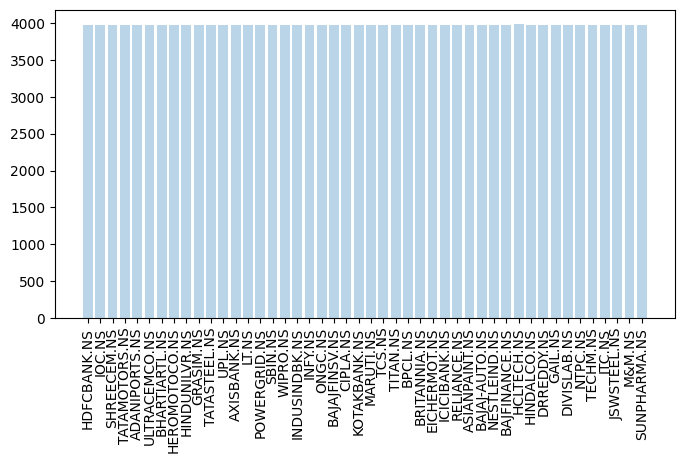

In [176]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [177]:
# create a list for dates with all ticker data points
date_list = list(data[data['tic']=='TCS.NS'].date)
# filter with date list
data_filtered = data[data['date'].isin(date_list)]

In [178]:
data_filtered.head()

,date,tic,close,high,low,open,volume
0,2008-01-01,HDFCBANK.NS,173.899994,170.500000,172.949997,173.000000,1310520
1,2008-01-02,HDFCBANK.NS,173.479996,169.029999,171.529999,173.399994,6239750
2,2008-01-03,HDFCBANK.NS,171.000000,167.619995,169.440002,171.000000,7018640
3,2008-01-04,HDFCBANK.NS,171.399994,169.399994,169.639999,170.300003,3729820
4,2008-01-07,HDFCBANK.NS,167.839996,161.229996,165.539993,165.100006,6322460


In [179]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data_filtered[data_filtered['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [180]:
print(data_points_df)

                0     1
0     HDFCBANK.NS  3984
1          IOC.NS  3984
2     SHREECEM.NS  3984
3   TATAMOTORS.NS  3984
4   ADANIPORTS.NS  3984
5   ULTRACEMCO.NS  3984
6   BHARTIARTL.NS  3984
7   HEROMOTOCO.NS  3984
8   HINDUNILVR.NS  3984
9       GRASIM.NS  3984
10   TATASTEEL.NS  3984
11         UPL.NS  3984
12    AXISBANK.NS  3984
13          LT.NS  3984
14   POWERGRID.NS  3984
15        SBIN.NS  3984
16       WIPRO.NS  3984
17  INDUSINDBK.NS  3984
18        INFY.NS  3984
19        ONGC.NS  3984
20  BAJAJFINSV.NS  3984
21       CIPLA.NS  3984
22   KOTAKBANK.NS  3984
23      MARUTI.NS  3984
24         TCS.NS  3984
25       TITAN.NS  3984
26        BPCL.NS  3984
27   BRITANNIA.NS  3984
28   EICHERMOT.NS  3984
29   ICICIBANK.NS  3984
30    RELIANCE.NS  3984
31  ASIANPAINT.NS  3984
32  BAJAJ-AUTO.NS  3984
33   NESTLEIND.NS  3984
34  BAJFINANCE.NS  3984
35     HCLTECH.NS  3984
36    HINDALCO.NS  3984
37     DRREDDY.NS  3984
38        GAIL.NS  3984
39    DIVISLAB.NS  3984
40        NTPC.N

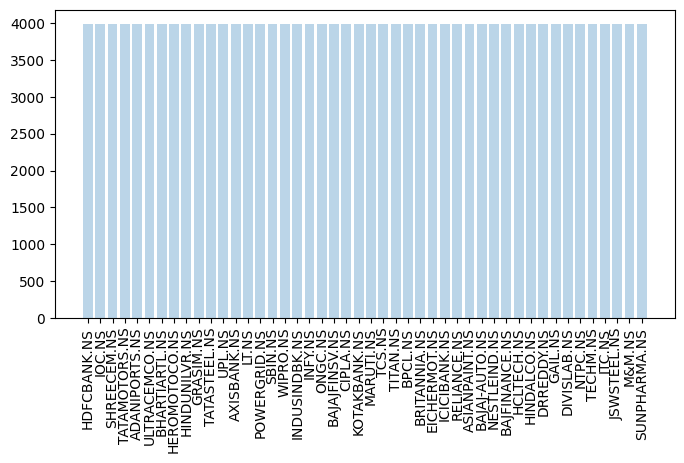

In [181]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [182]:
data_filtered.head()

,date,tic,close,high,low,open,volume
0,2008-01-01,HDFCBANK.NS,173.899994,170.500000,172.949997,173.000000,1310520
1,2008-01-02,HDFCBANK.NS,173.479996,169.029999,171.529999,173.399994,6239750
2,2008-01-03,HDFCBANK.NS,171.000000,167.619995,169.440002,171.000000,7018640
3,2008-01-04,HDFCBANK.NS,171.399994,169.399994,169.639999,170.300003,3729820
4,2008-01-07,HDFCBANK.NS,167.839996,161.229996,165.539993,165.100006,6322460


### 2.5 Save the Data to csv

In [183]:
data_filtered.to_csv('datasets/data.csv', index=False)

### 2.6 Create a Dataset for the Close Prices

In [184]:
# read the data from the saved csv file
df_prices = pd.read_csv('./datasets/data.csv')

In [185]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get the list of all the tickers
tic_list = list(set([i for i,j in df_prices.index]))

# Create an empty data frame for the close prices
df_close = pd.DataFrame()

In [186]:
len(tic_list)

46

In [187]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in tic_list:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series
    
df_close = df_close.reset_index()

In [188]:
df_close.head()

,date,HCLTECH.NS,EICHERMOT.NS,HINDALCO.NS,INDUSINDBK.NS,GRASIM.NS,AXISBANK.NS,ONGC.NS,BRITANNIA.NS,BPCL.NS,...,POWERGRID.NS,TATAMOTORS.NS,UPL.NS,BAJAJFINSV.NS,ICICIBANK.NS,DIVISLAB.NS,TCS.NS,TECHM.NS,BAJFINANCE.NS,BHARTIARTL.NS
0,2008-01-01,83.612503,41.000000,197.665359,131.000000,589.437805,196.690002,209.149994,149.000000,88.283333,...,83.221893,146.884857,119.633331,2630.000000,225.454544,482.487488,269.250000,289.937500,43.721157,450.628632
1,2008-01-02,81.474998,41.000000,199.115448,132.199997,590.209290,208.990005,214.833328,151.960007,88.083336,...,83.081268,152.729584,125.983330,2629.000000,236.309097,480.225006,265.250000,287.212494,45.858635,442.832764
2,2008-01-03,79.187500,46.200001,200.656158,131.399994,580.951111,209.929993,224.083328,152.899994,91.666664,...,85.725021,156.370575,126.616669,2600.000000,229.981812,480.975006,261.250000,287.000000,45.664318,434.789032
3,2008-01-04,79.237503,43.500000,200.203018,135.000000,563.823486,214.889999,226.000000,153.199997,92.800003,...,87.750023,157.922775,129.133331,2604.699951,236.363632,481.250000,255.725006,286.750000,49.356327,432.107788
4,2008-01-07,79.000000,42.400002,198.481033,134.500000,559.194397,219.399994,223.666672,153.289993,88.333336,...,86.175018,154.799194,129.666672,2599.000000,250.899994,474.674988,252.199997,278.750000,49.356327,427.105804


In [189]:
# Get Discriptive statistics
df_close.describe().T

,count,mean,std,min,25%,50%,75%,max
HCLTECH.NS,3984.0,474.982097,381.695581,23.687500,123.746876,424.037506,572.712524,1697.349976
EICHERMOT.NS,3984.0,1550.407044,1247.122608,16.000000,169.887497,1790.250000,2627.162598,4200.000000
HINDALCO.NS,3984.0,213.995454,128.824588,38.400002,124.380383,176.338264,239.462498,636.000000
INDUSINDBK.NS,3984.0,813.100740,550.375972,28.600000,296.474998,859.699982,1231.749969,2038.000000
GRASIM.NS,3984.0,791.759823,498.631725,140.415802,412.760742,578.165955,1053.149994,2244.000000
AXISBANK.NS,3984.0,476.166806,252.221592,59.340000,247.600006,478.199997,673.212479,1151.849976
ONGC.NS,3984.0,172.472389,41.894061,63.000000,147.987499,175.758331,195.412495,314.566681
BRITANNIA.NS,3984.0,1785.324385,1571.712727,110.250000,240.000000,1448.250000,3229.250000,5386.049805
BPCL.NS,3984.0,269.199029,151.652882,38.666664,113.893749,302.508331,394.750000,687.950012
RELIANCE.NS,3984.0,968.759567,748.170413,247.715591,427.679131,500.848602,1366.504517,2999.899902


In [190]:
# Save the Close Price datase

df_close.to_csv('datasets/close_prices.csv', index=False)

In [191]:
# Close prices for all the stocks
df_close_full_stocks = df_close

In [192]:
df_close_full_stocks.head()

,date,HCLTECH.NS,EICHERMOT.NS,HINDALCO.NS,INDUSINDBK.NS,GRASIM.NS,AXISBANK.NS,ONGC.NS,BRITANNIA.NS,BPCL.NS,...,POWERGRID.NS,TATAMOTORS.NS,UPL.NS,BAJAJFINSV.NS,ICICIBANK.NS,DIVISLAB.NS,TCS.NS,TECHM.NS,BAJFINANCE.NS,BHARTIARTL.NS
0,2008-01-01,83.612503,41.000000,197.665359,131.000000,589.437805,196.690002,209.149994,149.000000,88.283333,...,83.221893,146.884857,119.633331,2630.000000,225.454544,482.487488,269.250000,289.937500,43.721157,450.628632
1,2008-01-02,81.474998,41.000000,199.115448,132.199997,590.209290,208.990005,214.833328,151.960007,88.083336,...,83.081268,152.729584,125.983330,2629.000000,236.309097,480.225006,265.250000,287.212494,45.858635,442.832764
2,2008-01-03,79.187500,46.200001,200.656158,131.399994,580.951111,209.929993,224.083328,152.899994,91.666664,...,85.725021,156.370575,126.616669,2600.000000,229.981812,480.975006,261.250000,287.000000,45.664318,434.789032
3,2008-01-04,79.237503,43.500000,200.203018,135.000000,563.823486,214.889999,226.000000,153.199997,92.800003,...,87.750023,157.922775,129.133331,2604.699951,236.363632,481.250000,255.725006,286.750000,49.356327,432.107788
4,2008-01-07,79.000000,42.400002,198.481033,134.500000,559.194397,219.399994,223.666672,153.289993,88.333336,...,86.175018,154.799194,129.666672,2599.000000,250.899994,474.674988,252.199997,278.750000,49.356327,427.105804


In [193]:
pip install pickleshare

Note: you may need to restart the kernel to use updated packages.


In [194]:
%store df_close_full_stocks

Stored 'df_close_full_stocks' (DataFrame)


In [195]:
ticker_list = df_close_full_stocks.columns

In [196]:
print(ticker_list)

Index(['date', 'HCLTECH.NS', 'EICHERMOT.NS', 'HINDALCO.NS', 'INDUSINDBK.NS',
       'GRASIM.NS', 'AXISBANK.NS', 'ONGC.NS', 'BRITANNIA.NS', 'BPCL.NS',
       'RELIANCE.NS', 'GAIL.NS', 'ASIANPAINT.NS', 'ADANIPORTS.NS',
       'KOTAKBANK.NS', 'TATASTEEL.NS', 'TITAN.NS', 'M&M.NS', 'SUNPHARMA.NS',
       'INFY.NS', 'SHREECEM.NS', 'SBIN.NS', 'HINDUNILVR.NS', 'WIPRO.NS',
       'NTPC.NS', 'BAJAJ-AUTO.NS', 'DRREDDY.NS', 'CIPLA.NS', 'NESTLEIND.NS',
       'ITC.NS', 'MARUTI.NS', 'HEROMOTOCO.NS', 'LT.NS', 'ULTRACEMCO.NS',
       'IOC.NS', 'HDFCBANK.NS', 'JSWSTEEL.NS', 'POWERGRID.NS', 'TATAMOTORS.NS',
       'UPL.NS', 'BAJAJFINSV.NS', 'ICICIBANK.NS', 'DIVISLAB.NS', 'TCS.NS',
       'TECHM.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS'],
      dtype='object')
